<a href="https://colab.research.google.com/github/mrzResearchArena/TF-2.X/blob/master/hybrid-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
ls

drive/  sample_data/


In [3]:
cd 'drive/My Drive/Colab-Notebooks'

/content/drive/My Drive/Colab-Notebooks


In [4]:
ls

0_FINAL_anti_peptide_model_AC240-tensorboard.ipynb
0_FINAL_anti_peptide_model_ACP740-tensorboard.ipynb
500-164.h5
544_encoded_sequences_740.npy
ACP164.npy
ACP240_labels.npy
acp240.txt
ACP-500-164.h5
ACP500.npy
ACP740_labels.npy
ACP-740-tensorboard.ipynb
acp740.txt
blosum-164.npy
blosum-240.npy
blosum-500.npy
blosum62-acp240.npy
blosum62-acp740.npy
blosum-740.npy
bpf-164.npy
bpf-240.npy
bpf-500.npy
bpf-740.npy
BPF_coded_ACP164_sequences.npy
BPF_coded_ACP240_sequences.npy
BPF_coded_ACP500_sequences.npy
BPF_coded_ACP740_sequences.npy
dataset-50000.csv
dataset_to_one_hot_vector_representation.pkl
drive/
kmer_k_3_ACP240.npy
kmer_k_3_ACP740.npy
logs/
mACP-240.ipynb
mACP-740.ipynb
model-240b.png
model-240.png
model-50000.png
model-500-164.png
model-740.png
model.png
multichannel.png
physico_coded_ACP164_sequences.npy
physico_coded_ACP240_sequences.npy
physico_coded_ACP500_sequences.npy
physico_coded_ACP740_sequences.npy
Sarcasm_Headlines_Dataset_v2.json
X-50000.npy
Y-50000.npy


In [5]:
ls *.pkl -1

dataset_to_one_hot_vector_representation.pkl


In [16]:
# Deep Neural Networks:
import tensorflow as tf; print('We\'re working on TF-{}.'.format(tf.__version__))
from tensorflow.keras.layers import (Input, Dense, Dropout, Flatten, BatchNormalization,
                                     Conv1D, Conv2D, MaxPooling1D, MaxPooling2D,
                                     LSTM, GRU, Embedding, Bidirectional, concatenate)
from tensorflow.keras.regularizers import (l1, l2, l1_l2)
from tensorflow.keras.optimizers import (RMSprop, Adam, SGD)
from tensorflow.keras.models import (Sequential, Model)

# Core:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Performance:
from sklearn.metrics import (confusion_matrix, classification_report, matthews_corrcoef, precision_score)

#Utilities:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical as labelEncoding   # Usages: Y = labelEncoding(Y, dtype=int)
from tensorflow.keras.utils import plot_model                        # Usages: plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, expand_nested=True)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)
#end-import

We're working on TF-2.2.0-rc2.


In [0]:
# X = np.load('X-50000.npy')
# Y = np.load('Y-50000.npy')

# print(X.shape)
# print(Y.shape)

def zero_one_encoding(Y):
    '''
    Argument: Class Label (Y)
    --> [1, 0, 2]
    Return: one hot encoding matrix (2D-array NumPy-array)
    --> array([[0, 1, 0],
               [1, 0, 0],
               [0, 0, 1]])
    '''
    N = len(Y)
    K = len(set(Y))
    index = np.zeros(shape=(N, K), dtype=int)
    for i, value in enumerate(Y):
        index[i, value] = 1
    return index

In [10]:
# Data Load
D = pd.read_csv('dataset-50000.csv')
D.head(5)

,Sequence,Class,Index_0_A,Index_1_A,Index_2_A,Index_3_A,Index_4_A,Index_5_A,Index_6_A,Index_7_A,Index_8_A,Index_9_A,Index_10_A,Index_11_A,Index_12_A,Index_13_A,Index_14_A,Index_15_A,Index_16_A,Index_17_A,Index_18_A,Index_19_A,Index_20_A,Index_21_A,Index_22_A,Index_0_C,Index_1_C,Index_2_C,Index_3_C,Index_4_C,Index_5_C,Index_6_C,Index_7_C,Index_8_C,Index_9_C,Index_10_C,Index_11_C,Index_12_C,Index_13_C,Index_14_C,...,Index_6_G,Index_7_G,Index_8_G,Index_9_G,Index_10_G,Index_11_G,Index_12_G,Index_13_G,Index_14_G,Index_15_G,Index_16_G,Index_17_G,Index_18_G,Index_19_G,Index_20_G,Index_21_G,Index_22_G,Index_0_T,Index_1_T,Index_2_T,Index_3_T,Index_4_T,Index_5_T,Index_6_T,Index_7_T,Index_8_T,Index_9_T,Index_10_T,Index_11_T,Index_12_T,Index_13_T,Index_14_T,Index_15_T,Index_16_T,Index_17_T,Index_18_T,Index_19_T,Index_20_T,Index_21_T,Index_22_T
0,GCAGCATCCCAACCAGGTGGAGG,2,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,GCGGGAGTGAGAGGACTGGGCGG,9,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,1,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,ATGACTCTCATACTCCACGAAGG,8,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,GAGTCATCGAGCAGCTGCCATGG,8,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,AGTCACCCTAGCAAAACCAGTGG,3,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
# Features and Labels
from joblib import load
X = joblib.load('dataset_to_one_hot_vector_representation.pkl')  
y = D.iloc[:, 1]
print(X.shape)

(50000, 4, 23)


In [18]:
print(y.value_counts())

0     4985
2     2787
1     2768
7     2768
8     2764
5     2750
6     2736
9     2730
4     2712
3     2695
11    2379
15    2360
10    2329
13    2315
14    2287
16    2277
12    2262
17    2070
18    2026
Name: Class, dtype: int64


In [14]:
for i in range(len(y)):
    if y[i] == -1:
        y[i] = 10
    elif y[i] == -2:
        y[i] = 11
    elif y[i] == -3:
        y[i] = 12
    elif y[i] == -4:
        y[i] = 13
    elif y[i] == -5:
        y[i] = 14
    elif y[i] == -6:
        y[i] = 15
    elif y[i] == -7:
        y[i] = 16
    elif y[i] == -8:
        y[i] = 17
    elif y[i] == -9:
        y[i] = 18

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: S

In [19]:
print(y.value_counts())

0     4985
2     2787
1     2768
7     2768
8     2764
5     2750
6     2736
9     2730
4     2712
3     2695
11    2379
15    2360
10    2329
13    2315
14    2287
16    2277
12    2262
17    2070
18    2026
Name: Class, dtype: int64


In [0]:
Y = y

In [0]:
# Train and Test Split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.10)

In [32]:
print(Xtrain.shape, Ytrain.shape)
print(Xtest.shape,  Ytest.shape)

(45000, 4, 23) (45000,)
(5000, 4, 23) (5000,)


In [33]:
# Label Enconding

Ytrain = zero_one_encoding(Ytrain)
print(Ytrain.shape)

Ytest = zero_one_encoding(Ytest)
print(Ytest.shape)

(45000, 19)
(5000, 19)


In [34]:
Xtrain.shape

(45000, 4, 23)

In [0]:
def Network():
    # Stage 0
    input_data = Input(shape=(4, 23)) 
    
    # Stage 1
    x = Conv1D(filters=16, kernel_size=7, strides=1, padding='same', activation='relu')(input_data)
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    
    # Stage 2
    x = Conv1D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    
    # Stage 3
    x = Conv1D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)

    # Stage 4
    x = Conv1D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    
    # Stage 5
    x = Conv1D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    
    # Stage 6
    x = Conv1D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Flatten()(x)
    
    # Stage 7
    x = Dense(units=1024, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.25)(x)
    
    # Stage 8
    output = Dense(units=19, activation='softmax')(x)

    return Model(inputs=[input_data], outputs=[output])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4, 23)]           0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 4, 16)             2592      
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 2, 16)             0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 2, 16)             64        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 2, 32)             2592      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 1, 32)             0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 1, 32)             128 

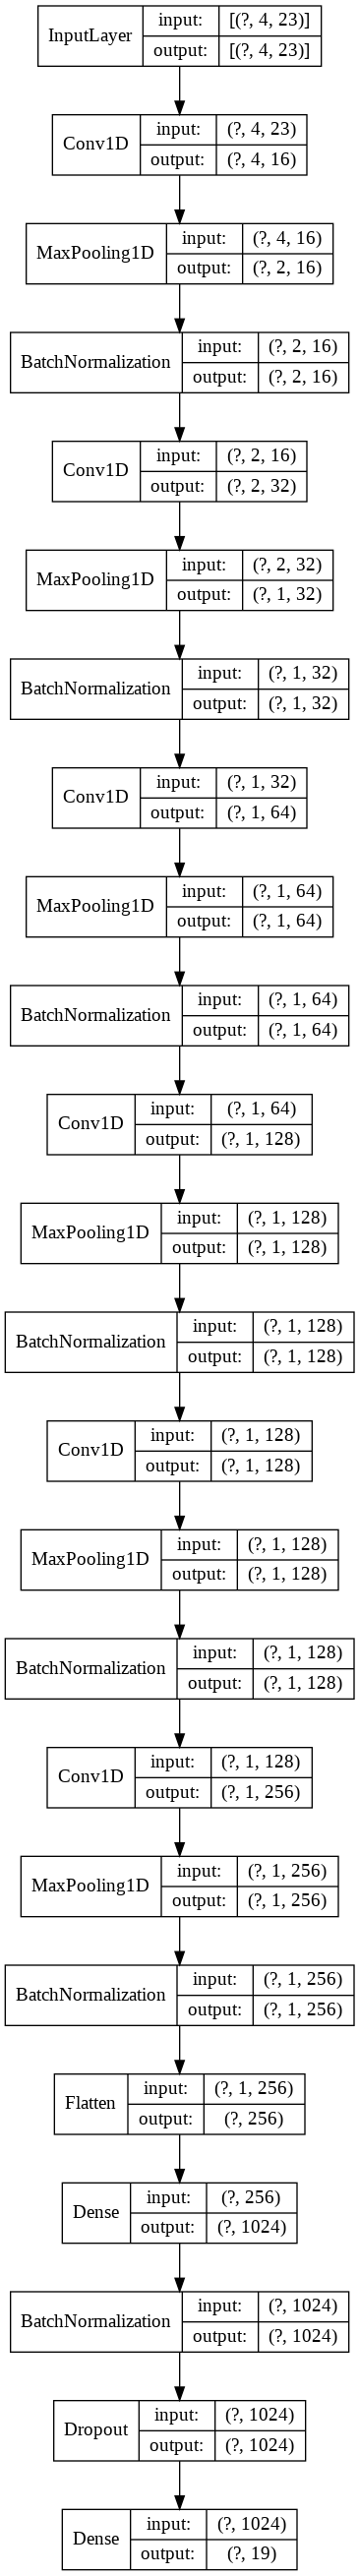

In [36]:
model = Network()
model.summary()
plot_model(model, to_file='model-50000.png', show_shapes=True, show_layer_names=False, expand_nested=True)

In [37]:
print(X.shape)
print(Y.shape)

(50000, 4, 23)
(50000,)


In [38]:
help(MaxPooling1D.__init__)

Help on function __init__ in module tensorflow.python.keras.layers.pooling:

__init__(self, pool_size=2, strides=None, padding='valid', data_format='channels_last', **kwargs)



In [0]:
setEpochNumber     = 100
setBatchSizeNumber = 64

In [40]:
# Setting up the model

model = Network()
model.compile(optimizer=Adam(), # learning_rate=0.005
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model

results = model.fit(x=Xtrain, y=Ytrain,
                    validation_split=0.10,
                    batch_size=setBatchSizeNumber, epochs=setEpochNumber)

Epoch 1/100
633/633 [==============================] - 8s 13ms/step - loss: 3.3603 - accuracy: 0.0643 - val_loss: 3.0570 - val_accuracy: 0.0711
Epoch 2/100
633/633 [==============================] - 8s 12ms/step - loss: 3.1052 - accuracy: 0.0759 - val_loss: 3.0775 - val_accuracy: 0.0853
Epoch 3/100
633/633 [==============================] - 8s 12ms/step - loss: 3.0713 - accuracy: 0.0876 - val_loss: 3.0231 - val_accuracy: 0.1024
Epoch 4/100
633/633 [==============================] - 8s 13ms/step - loss: 3.0437 - accuracy: 0.0932 - val_loss: 3.0003 - val_accuracy: 0.0960
Epoch 5/100
633/633 [==============================] - 9s 14ms/step - loss: 3.0155 - accuracy: 0.0997 - val_loss: 3.1440 - val_accuracy: 0.1004
Epoch 6/100
633/633 [==============================] - 9s 13ms/step - loss: 2.9971 - accuracy: 0.1012 - val_loss: 3.0667 - val_accuracy: 0.1004
Epoch 7/100
633/633 [==============================] - 9s 14ms/step - loss: 2.9671 - accuracy: 0.1108 - val_loss: 3.0893 - val_accuracy:

In [41]:
# Evaluation

print('Training Accuracy: {}'.format(model.evaluate(Xtrain, Ytrain)))
print('Testing  Accuracy: {}'.format(model.evaluate(Xtest,  Ytest)))

1407/1407 [==============================] - 3s 2ms/step - loss: 1.3845 - accuracy: 0.6321
Training Accuracy: [1.3845127820968628, 0.6321333050727844]
157/157 [==============================] - 0s 2ms/step - loss: 3.4858 - accuracy: 0.1812
Testing  Accuracy: [3.4857664108276367, 0.18119999766349792]
